# Trabalho 1 - Snakes and Ladders

Felipe Souza Tanios, RA 155330

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plays = 200
board_size = 100
dice = 6

mobility_dict = {
        1  :38,
        4  :14,
        9  :31,
        21 :42,
        28 :84,
        36 :44,
        51 :67,
        71 :91,
        80 :100,
        98 :78,
        95 :75,
        93 :73,
        87 :24,
        64 :60,
        62 :19,
        56 :53,
        49 :11,
        48 :26,
        16 :6
}

In [3]:
results = np.zeros((plays, board_size), dtype = np.float64)

for i in range(len(results)):
    for j in range(len(results[i])):
        
        if i == 0:
            if j < dice:
                results[i][j] = (1.0/dice)
        if i > 0:
            results[i][j] += np.sum([(1.0/dice)*results[i-1][j-(k+1)] for k in range(dice) if 0<=j-(k+1)<100])

        #the jumping part
        if j+1 in mobility_dict.keys():
            results[i][(mobility_dict[j+1])-1] +=  results[i][j]
            results[i][j] = 0
    

In [4]:
chance_to_win = []
cumulative_chance = []
for result in results:
#     with the following line we can see numeric issues due to float type being multiplied numerous times
    print(np.sum(result))
    chance_to_win.append(result[-1])
    cumulative_chance.append(sum(chance_to_win))


1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9995927640603565
0.9961794838820299
0.9883155832444237
0.9767929263461274
0.9619895950864603
0.9436978567066059
0.922645352707725
0.900129055336921
0.8767853165722778
0.8524437857536771
0.826843837646624
0.8001470739373578
0.7728263602610946
0.7452971241535822
0.7177672021822857
0.6903593384342992
0.6632548994574723
0.6366914972042806
0.6108674731387655
0.585880865811313
0.561749496153956
0.5384670053873796
0.516036791679317
0.49446906301743054
0.47376321683872735
0.45389970796755874
0.43484650593700436
0.4165704003324702
0.3990431300675957
0.38224038383526987
0.3661379619914653
0.3507096154363988
0.3359277148281327
0.3217651325056499
0.308196430265428
0.29519778054660417
0.28274626415885445
0.2708193869251701
0.25939511721249436
0.2484522004794735
0.2379703836301593
0.2279303997681972
0.2183138095753649
0.2091028649415083
0.20028047246200978
0.19183022312489245
0.18373641650932065
0.17598404215960664
0.1685587302970289
0.16144670

The following error is due to the big numeric error seen before, from the 3rd iteration on

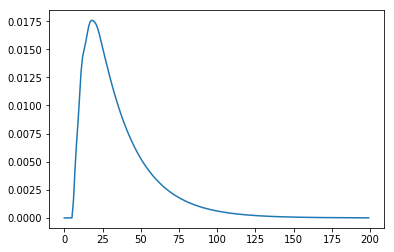

<function matplotlib.pyplot.show(*args, **kw)>

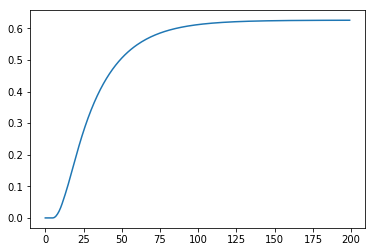

In [5]:
plt.plot(chance_to_win)
plt.show()
plt.plot(cumulative_chance)
plt.show

When we rescale both arrays so that we correct numeric value, we get the same graph as supposed from http://www.datagenetics.com/blog/november12011/.
I still don't think that this is the best way to fix this behaviour, although it works, and makes sense mathematically.

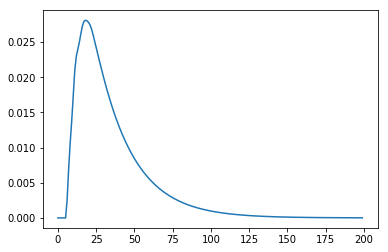

<function matplotlib.pyplot.show(*args, **kw)>

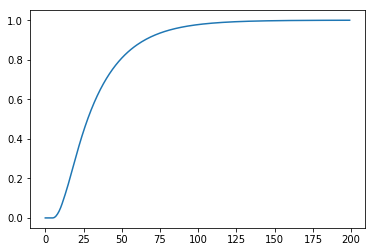

In [6]:
chance_to_win = chance_to_win/np.amax(cumulative_chance)
cumulative_chance = cumulative_chance/np.amax(cumulative_chance)
plt.plot(chance_to_win)
plt.show()
plt.plot(cumulative_chance)
plt.show